# Data pre-processing and generation

In [2]:
!pip install xlrd
!pip install openpyxl

  Using cached https://files.pythonhosted.org/packages/a6/0c/c2a72d51fe56e08a08acc85d13013558a2d793028ae7385448a6ccdfae64/xlrd-2.0.1-py2.py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.
  Using cached https://files.pythonhosted.org/packages/6a/94/a59521de836ef0da54aaf50da6c4da8fb4072fb3053fa71f052fd9399e7a/openpyxl-3.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/96/c2/3dd434b0108730014f1b96fd286040dc3bcb70066346f7e01ec2ac95865f/et_xmlfile-1.1.0-py3-none-any.whl
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
data = pd.read_excel('comment_keyphrases.xlsx',engine='openpyxl')
data.head()

,id,comment,comment_keyphrases,label,political,religion,other
0,UgjsJ8edAikfNngCoAEC,"butthurt old fuck, someone ought to teach him ...",butthurt fuck pathetic swine,1.0,0.0,0.0,1.0
1,Ugw01F2oXDD_in0pKcN4AaABAg,When someone presents you with new info that f...,knee-jerk,1.0,0.0,0.0,1.0
2,UgjOYOFZD27I9XgCoAEC,CORRUPTION. raises bail because shes not in a ...,CORRUPTION fuck,1.0,0.0,0.0,1.0
3,UghINqGgHMsSpngCoAEC,"you do realize if trump doesn't win, we are sc...",screwed.,1.0,0.0,0.0,1.0
4,UgyJOdnd7DjvH2vkunN4AaABAg,"Poor impulse control, parents. Some black kid...",black-kids,1.0,0.0,0.0,1.0


In [4]:
ckey = data['comment_keyphrases'].values

In [6]:
!pip install spacy
!pip install nltk

  Using cached https://files.pythonhosted.org/packages/71/47/07bf401bec584df524ff91eacdc974eb6bff1baf6ab6d19acd29eef0a2fc/spacy-3.5.2-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/0b/8e/f1a0a5a76cfef77e1eb6004cb49e5f8d72634da638420b9ea492ce8305e8/typing_extensions-4.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/62/8c/814e0bd139a8c94b50298be3a4e640d90cdce78efe0099e373a767b7d854/spacy_loggers-1.0.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/09/eac97626751799c75205dccd59d7e0105b1adca4a4e44ab7ebb67c51704a/preshed-3.0.8-cp37-cp37m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/58/5f/1f2833d59abf53e24dbadc21b0565fe10c64545da8705faed8eff3b14745/wasabi-1.1.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/fe/c3/0d04d248624a181e57c2870127dfa8d371973561caf54333c85e8f9133a2/langcodes-3.3.0-py3-none-any.whl
  Using cached https://files.pyth

In [8]:
!python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8MB 2.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/jq/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
root_wrd = []
root_seg = []
noisy_words = ['-','.','the','you','be', 'of', 'will','you\'re', 'up', 'snl', 'that','as','','on','a','an','it','se',
               'go','the-5th', 'what','about','thing','out','yourself','color','maybe','someone','her','his','their',
               'them','like','he','she','my','off','by','your','*','f','do','this','those','!','in','too','to','wasn\'t'
               ,'and','year','old','five','put','take','look','some','still','throw','they','turn','completely',
               '-up','how','i\'m','one','all','didn\'t','seem','sound','work','side','sure','for','would','two',
               'well','with', 'wht','America','express','have', 'if','judge','can\'t','cannot','handle','should',
               'make','sandwich','real','tor','off','basically','so','even','object','ya','who','talk','person',
               'intent','gonna','wanna','havent','watch','enough','late','night','golden','channel','ffs','any',
               'leave','really','full','people','kick','foot','can','delivery','diver','supporter','lol',
               'care','business','by-666','o','here','tip','face','upon','class','act','being','i','more','alt',
               'not','english','just','own','club','booo', 'hooo','surprising', 'give','agenda','it\'s','truly',
               '..','somebody','name','need','intelligent','over','sorry','permit','waste','fluid','nothing','news',
               'quran','ha','we\'ve','thousand','get','involve','soon','else','say','room','mt','laugh','jews',
               'themselves','sounds','depth','mouth','other','dont','look','or','whoa','omg','pepole','see',
               'food','america','u','from','feel','no','solution','making','himself','at','place','her-3rd',
               'change','living','keep','has','proof','head','doesn\'t','leg','stand','home','give-','you\'re']
print(len(noisy_words))
noisy_words_root=[]
for nw in noisy_words:
    tmp = nlp(nw)
    tmp2 = ' '.join([tok.lemma_.title() if tok.is_title else tok.lemma_ for tok in tmp])
    noisy_words_root.append(tmp2)

#print(noisy_words_root)

for kw in ckey:
    doc = nlp(kw)
    newtext = ' '.join([tok.lemma_.title() if tok.is_title else tok.lemma_ for tok in doc])
    for token in newtext.split(' '):
        if token.lower() not in noisy_words_root :
            root_wrd.append(token)
print(root_wrd)

211
['butthurt', 'fuck', 'pathetic', 'swine', 'knee', 'jerk', 'corruption', 'fuck', 'screw', 'black', 'kid', 'Spoil', 'twat', 'shameful', 'piece', 'shit', 'whore', 'kill', 'stupid', 'rape', 'kill', "you're", 'stupid', 'wtf', 'mentally', 'unstable', 'fuckin', 'hoeeible', 'rubbish', 'fucking', 'shit', 'rubbish', 'shut', 'Fuk', 'god', 'damn', 'weed', 'biased', 'ass', 'cunt', 'fucking', 'idiot', 'asshole', 'garbage', 'shit', 'ashamed', 'baffoon', 'Hard', 'slut', 'sexism', 'Fucking', 'bitch', 'imbecile', 'moron', 'stupid', 'insult', 'fuckin', 'disgusting', 'Smite', 'ass', 'drunk', 'insane', 'Fake', 'fuck', 'fuck', 'spoof', 'stupid', 'crap', 'white', 'guy', 'shit', 'soyboy', 'rushmoore', 'moron', 'stupid', 'ahead', 'toxicity', 'crap', 'Choke', 'shit', 'race', 'baiting', 'penis', 'WTF', 'fuck', 'dice', 'cunt', 'criminally', 'stupid', 'rapist', 'drug', 'dealer', 'thug', 'shit', 'finish', 'grade', 'shit', 'slave', 'owning', 'ancestor', 'fuck', 'fuck', 'asshole', 'stupid', 'shit', 'moron', 'Fuck

In [11]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
root_wrd_stemmed = []
for token in root_wrd:
    root_wrd_stemmed.append(stemmer.stem(token))

In [12]:
unique_wrd = []
for w in root_wrd_stemmed:
    if w not in unique_wrd:
        unique_wrd.append(w)
print(len(root_wrd_stemmed), len(unique_wrd))

3044 932


In [13]:
from collections import Counter
tf = Counter(root_wrd_stemmed)
print(tf)

Counter({'fuck': 285, 'shit': 159, 'stupid': 144, 'ass': 103, 'bitch': 100, 'racist': 63, 'hell': 36, 'asshol': 31, 'dumb': 30, 'bullshit': 30, 'white': 28, 'moron': 27, 'wtf': 26, 'damn': 25, 'cunt': 25, 'kill': 24, 'black': 23, 'rape': 21, 'fake': 21, 'hate': 21, 'idiot': 20, 'littl': 20, 'suck': 20, 'dick': 18, 'racism': 16, 'nigga': 16, 'gay': 14, 'fuckin': 13, 'dumbass': 13, 'scum': 13, 'bunch': 13, 'fat': 13, 'lmao': 13, 'piec': 12, 'crap': 11, 'slave': 11, 'ignor': 11, 'piss': 11, 'whore': 10, 'disgust': 10, 'guy': 10, 'beat': 10, 'cri': 10, 'big': 10, 'woman': 10, 'shut': 9, 'pussi': 9, 'dirti': 9, 'sex': 9, 'crazi': 9, 'shame': 8, 'nasti': 8, 'bad': 8, 'back': 8, 'devil': 8, 'fucker': 8, 'bastard': 8, 'bia': 8, 'ugli': 8, 'hilari': 8, 'man': 7, 'shitti': 7, 'lie': 7, 'evil': 7, 'trash': 7, 'power': 7, 'retard': 7, 'holi': 7, 'i': 7, 'cheap': 7, 'into': 7, 'fire': 7, 'garbag': 6, 'crimin': 6, 'disrespect': 6, 'show': 6, 'girl': 6, 'funni': 6, "don't": 6, 'butt': 6, 'pig': 6, 'h

In [14]:
#phrases
root_seg = []
for kw in ckey:
    if '-' in kw and len(kw)>1:
        #print(kw, len(kw))
        tmp = kw.split(' ')
        for p in tmp:
            if '-' in p:
                root_seg.append(p.replace('-',' '))
#print(root_seg)
tf_seg = Counter(root_seg)
print(tf_seg)

Counter({'fuck you': 6, 'piece of shit': 6, 'fucked up': 4, 'black people': 4, 'fake news': 4, 'little bitch': 4, 'what the fuck': 3, 'shut the fuck up': 3, 'white person': 3, 'Holy shit': 3, 'butt hurt': 3, 'full of shit': 3, 'fat fuck': 3, 'fuck off': 3, 'pieces of shit': 2, 'will kill you': 2, 'white ass': 2, 'rape victims': 2, 'white America': 2, 'stupid bitch': 2, 'beat the shit out': 2, 'fake ass': 2, 'What a dick': 2, 'complete bullshit': 2, 'old fart': 2, 'a bastard': 2, 'holy shit': 2, 'sexual assault': 2, 'Dumb ass': 2, 'being a bitch': 2, 'dumb ass': 2, 'so stupid': 2, 'What the fuck': 2, 'fat cunt': 2, 'cheap fucks': 2, 'this shit': 2, 'being stupid': 2, 'fucked over': 2, 'foul mouthed': 2, 'foot in your ass': 2, 'white people': 2, 'go to hell': 2, 'big gay': 2, 'mad as hell': 2, 'suck it': 2, 'son of bitch': 2, 'knee jerk': 1, 'black kids': 1, 'Spoiled twat': 1, 'stupid people': 1, "you're stupid": 1, 'mentally unstable': 1, 'fuckin hoeeible': 1, 'shut up': 1, 'Fuk You': 1

In [ ]:
!pip install sentence-similarity
!pip install -U sentence-transformers

In [ ]:
from sentence_similarity import sentence_similarity
model=sentence_similarity(model_name='distilbert-base-uncased',embedding_type='sentence_embedding')

In [ ]:
import csv
header = ['phraseI', 'phraseIplusK', 'cosineScore']

with open('phrase_similarity.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f, delimiter =',')

    # write the header
    writer.writerow(header)
    for i in range(len(root_seg[0::1])):
        for k in range(len(root_seg[i::1])):
            if i != k:
                score=model.get_score(root_seg[i],root_seg[k],metric="cosine")
                tmp = [root_seg[i],root_seg[k],score]
                writer.writerow(tmp)
                print(i,'/',len(root_seg[0::1]),' and ',k,'/',len(root_seg[i::1]))
                print('[',root_seg[i],'] vs [',root_seg[k],']->[',score,']')

# Analytics: data visualization

In [15]:
import pandas as pd
scores =[]
data = pd.read_csv('phrase_similarity.csv')
print(len(data))

611618


<AxesSubplot:ylabel='cosineScore'>

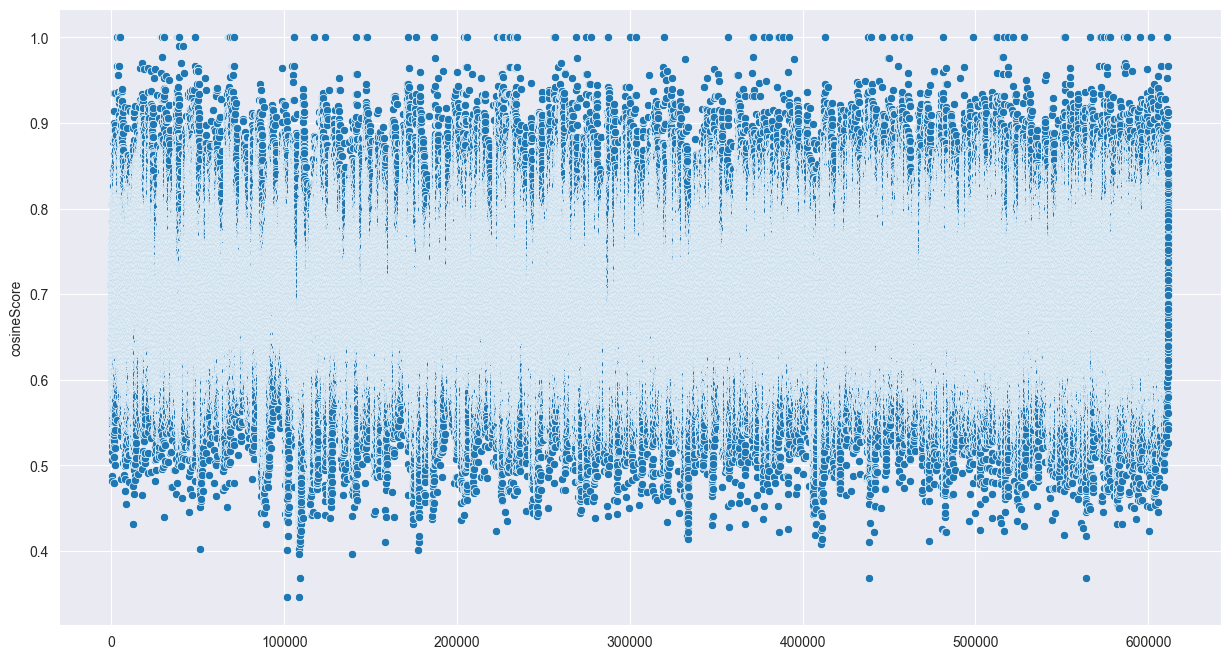

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize=(15,8))
sns.scatterplot(data['cosineScore'])#.drop_duplicates())

In [17]:
l45 = data['cosineScore'][data['cosineScore'] <= 0.45 ].count() # less 0.5
l5 = data['cosineScore'][data['cosineScore'] <= 0.5 ].count() # less 0.5
l6 = data['cosineScore'][data['cosineScore'] <= 0.6].count() # less 0.6
l7 = data['cosineScore'][data['cosineScore'] <= 0.7].count() # less 0.7
l8 = data['cosineScore'][data['cosineScore'] <= 0.8].count() # less 0.8
l9 = data['cosineScore'][data['cosineScore'] <= 0.9].count() # less 0.9
l95 = data['cosineScore'][data['cosineScore'] <= 0.95].count() # less 0.95
g95 = data['cosineScore'][data['cosineScore'] > 0.95 ].count() # greater 0.95
e100 = data['cosineScore'][data['cosineScore'] == 1.0 ].count() # match 100%
print('<=0.45           ', l45)
print('0.45 < x <= 0.5  ', l5 - l45)
print('0.5 < x <= 0.6   ', l6 - l5)
print('0.6 < x <= 0.7   ', l7 - l6)
print('0.7 < x <= 0.8   ', l8 - l7)
print('0.8 < x <= 0.9   ', l9 - l8)
print('0.9 < x <= 0.95  ', l95 - l9)
print('0.95 < x < 1.0   ', g95 - e100)
print('=1.0             ', e100)

<=0.45            208
0.45 < x <= 0.5   1654
0.5 < x <= 0.6    42876
0.6 < x <= 0.7    231356
0.7 < x <= 0.8    278246
0.8 < x <= 0.9    55412
0.9 < x <= 0.95   1584
0.95 < x < 1.0    156
=1.0              126


In [18]:
# keyphrases having cosineScor ==100%
data_1 = data[data['cosineScore'] ==1.0]
data_1.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
3376,pieces of shit,Pieces of shit,1.0
4196,pieces of shit,pieces of shit,1.0
4956,will kill you,will kill you,1.0
28816,what the fuck,what the fuck,1.0
28961,what the fuck,What the fuck,1.0
30166,fucked up,fucked up,1.0
38142,FUCK YOU,fuck you,1.0
38342,FUCK YOU,Fuck you,1.0
48232,shut the fuck up,shut the fuck up,1.0
67697,fuck you,FUCK YOU,1.0


In [19]:
# keyphrases having cosineScor >95
data_95 = data[data['cosineScore'] > 0.95 ]
data_95 = data_95[data_95['cosineScore'] != 1.0 ]
data_95.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
3410,pieces of shit,piece of shit,0.967
3711,pieces of shit,a piece of shit,0.956
4145,pieces of shit,Piece of shit,0.967
16562,Fake as fuck,fake as shit,0.964
17827,stupid crap,stupid shit,0.970
...,...,...,...
586456,white supremacist crap,white supremacists,0.958
590486,slave owners,white slave owners,0.961
599550,race baiter,race baiting,0.963
605541,you fools,you worthless,0.955


In [20]:
# keyphrases having cosineScor >90 <95
data_9 = data[data['cosineScore'] > 0.90 ]
data_9 = data_9[data_9['cosineScore'] <= 0.95 ]
data_9.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
1308,black kids,black people,0.935
1485,black kids,black guy,0.914
3817,pieces of shit,bunch of shit,0.936
3972,pieces of shit,full of shit,0.928
4251,pieces of shit,piece of trash,0.923
...,...,...,...
606985,drug addict,drug dealers,0.933
609161,worthless animal,you worthless,0.901
609541,filled with shit,pieces of shit,0.906
611186,Bunch of trash,pieces of shit,0.909


In [21]:
# keyphrases having cosineScor >80 <90
data_8 = data[data['cosineScore'] > 0.80 ]
data_8 = data_8[data_8['cosineScore'] <= 0.90 ]
data_8.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
501,knee jerk,butt hurt,0.805
1024,knee jerk,a jerk,0.840
1109,black kids,stupid people,0.828
1121,black kids,white guy,0.878
1127,black kids,drug dealers,0.804
...,...,...,...
611542,little slut,Spoiled twat,0.826
611543,little slut,pieces of shit,0.826
611545,little slut,stupid people,0.804
611549,little slut,shut up,0.802


In [22]:
# keyphrases having cosineScor >70 <80
data_7 = data[data['cosineScore'] > 0.70 ]
data_7 = data_7[data_7['cosineScore'] <= 0.80 ]
data_7.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
0,knee jerk,black kids,0.709
1,knee jerk,Spoiled twat,0.713
2,knee jerk,pieces of shit,0.710
4,knee jerk,stupid people,0.722
6,knee jerk,mentally unstable,0.739
...,...,...,...
611605,dick sucker,Spoiled twat,0.767
611606,dick sucker,pieces of shit,0.704
611607,dick sucker,will kill you,0.701
611613,biased bullshit,black kids,0.785


In [23]:
# keyphrases having cosineScor >60 <70
data_6 = data[data['cosineScore'] > 0.60 ]
data_6 = data_6[data_6['cosineScore'] <= 0.70 ]
data_6.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
3,knee jerk,will kill you,0.648
5,knee jerk,you're stupid,0.681
9,knee jerk,Fuk You,0.666
10,knee jerk,god damn,0.675
11,knee jerk,is biased,0.668
...,...,...,...
611588,thug gangster,you're stupid,0.664
611590,suvking ass,knee jerk,0.700
611612,biased bullshit,knee jerk,0.689
611615,White people suck,knee jerk,0.683


In [24]:
# keyphrases having cosineScor >50 <60
data_5 = data[data['cosineScore'] > 0.50 ]
data_5 = data_5[data_5['cosineScore'] <= 0.60 ]
data_5.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
7,knee jerk,fuckin hoeeible,0.548
30,knee jerk,the thing about the blacksssss,0.562
35,knee jerk,white supremacist,0.587
37,knee jerk,white supremacists,0.584
47,knee jerk,makes as much sense as a black man,0.551
...,...,...,...
611165,put your foot up your ass,is biased,0.526
611176,put your foot up your ass,drug dealers,0.543
611178,put your foot up your ass,slave owning ancestors,0.561
611274,keep kickin,mentally unstable,0.581


In [25]:
# keyphrases having cosineScor >45 <50
data_45 = data[data['cosineScore'] > 0.45 ]
data_45 = data_45[data_45['cosineScore'] <= 0.50 ]
data_45.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
102,knee jerk,One is a bottom feeding scum sucker and the ot...,0.488
109,knee jerk,is the worse of the two evils,0.482
1207,black kids,One is a bottom feeding scum sucker and the ot...,0.479
5617,stupid people,One is a bottom feeding scum sucker and the ot...,0.484
7476,you're stupid,hammer their sqauare pegs into the round hole,0.489
...,...,...,...
605505,you crazy,One is a bottom feeding scum sucker and the ot...,0.457
606050,that race,One is a bottom feeding scum sucker and the ot...,0.484
606156,to piss,One is a bottom feeding scum sucker and the ot...,0.485
606261,racist parents,One is a bottom feeding scum sucker and the ot...,0.480


In [26]:
# keyphrases having cosineScor <=45%
data_l45 = data[data['cosineScore'] <= 0.45 ]
data_l45.drop_duplicates()

,phraseI,phraseIplusK,cosineScore
12202,god damn,One is a bottom feeding scum sucker and the ot...,0.432
30664,you worthless,One is a bottom feeding scum sucker and the ot...,0.440
44587,You stupid,One is a bottom feeding scum sucker and the ot...,0.446
50956,gay Catholic,One is a bottom feeding scum sucker and the ot...,0.402
86736,fuck the shit out of,fiction false,0.445
...,...,...,...
584925,ass backwards,One is a bottom feeding scum sucker and the ot...,0.431
591621,fat fucking,One is a bottom feeding scum sucker and the ot...,0.450
593000,plain stupid,One is a bottom feeding scum sucker and the ot...,0.438
600695,white privilege,One is a bottom feeding scum sucker and the ot...,0.423


In [27]:
from collections import Counter
tf = Counter(data['phraseI'])
print(tf)

Counter({'black people': 2907, 'white person': 2667, 'fuck you': 2123, 'fucked up': 2056, 'what the fuck': 1989, 'white America': 1889, 'shut the fuck up': 1867, 'fake news': 1865, 'piece of shit': 1836, 'stupid bitch': 1806, 'beat the shit out': 1748, 'will kill you': 1663, 'rape victims': 1469, 'a bastard': 1451, 'pieces of shit': 1323, 'complete bullshit': 1317, 'Holy shit': 1239, 'What a dick': 1182, 'dumb ass': 1143, 'knee jerk': 1105, 'black kids': 1104, 'Spoiled twat': 1103, 'old fart': 1103, 'stupid people': 1100, "you're stupid": 1099, 'mentally unstable': 1098, 'fuckin hoeeible': 1097, 'shut up': 1096, 'Fuk You': 1095, 'god damn': 1094, 'is biased': 1093, 'Hard slut': 1092, 'That drunk': 1091, 'Fake as fuck': 1090, 'stupid crap': 1089, 'white guy': 1088, 'make room on mt': 1087, 'like crap': 1086, 'Choke on it': 1085, 'shit like': 1084, 'race baiting': 1083, 'drug dealers': 1082, 'go finish the 5th grade': 1081, 'slave owning ancestors': 1080, 'you worthless': 1077, 'eat it u

In [28]:
tf_kw=pd.DataFrame([{'fuck': 285, 'shit': 159, 'stupid': 144, 'ass': 103, 'bitch': 100, 'racist': 63, 'hell': 36, 'asshol': 31, 'dumb': 30, 'bullshit': 30, 'white': 28, 'moron': 27, 'wtf': 26, 'damn': 25, 'cunt': 25, 'kill': 24, 'black': 23, 'rape': 21, 'fake': 21, 'hate': 21, 'idiot': 20, 'littl': 20, 'suck': 20, 'dick': 18, 'racism': 16, 'nigga': 16, 'gay': 14, 'fuckin': 13, 'dumbass': 13, 'scum': 13, 'bunch': 13, 'fat': 13, 'lmao': 13, 'piec': 12, 'crap': 11, 'slave': 11, 'ignor': 11, 'piss': 11, 'whore': 10, 'disgust': 10, 'guy': 10, 'beat': 10, 'cri': 10, 'big': 10, 'woman': 10, 'shut': 9, 'pussi': 9, 'dirti': 9, 'sex': 9, 'crazi': 9, 'shame': 8, 'nasti': 8, 'bad': 8, 'back': 8, 'devil': 8, 'fucker': 8, 'bastard': 8, 'bia': 8, 'ugli': 8, 'hilari': 8, 'man': 7, 'shitti': 7, 'lie': 7, 'evil': 7, 'trash': 7, 'power': 7, 'retard': 7, 'holi': 7, 'i': 7, 'cheap': 7, 'into': 7, 'fire': 7, 'garbag': 6, 'crimin': 6, 'disrespect': 6, 'show': 6, 'girl': 6, 'funni': 6, "don't": 6, 'butt': 6, 'pig': 6, 'hole': 6, 'butthurt': 5, 'jerk': 5, 'slut': 5, 'rapist': 5, 'joke': 5, 'loser': 5, 'meadow': 5, 'sassi': 5, 'world': 5, 'life': 5, 'these': 5, 'murder': 5, 'kid': 4, 'twat': 4, 'mental': 4, 'race': 4, 'worthless': 4, 'supremacist': 4, 'punk': 4, 'silli': 4, 'lip': 4, 'nazi': 4, 'racial': 4, 'rude': 4, 'anim': 4, 'douch': 4, 'abus': 4, 'bulli': 4, 'know': 4, 'fool': 4, 'human': 4, 'bag': 4, 'hypocrit': 4, 'bust': 4, 'where': 4, 'muslim': 4, 'slap': 4, 'down': 4, 'want': 4, 'liar': 4, 'ars': 4, 'cock': 4, 'sick': 4, 'die': 4, 'pathet': 3, 'corrupt': 3, 'rubbish': 3, 'bias': 3, 'insan': 3, 'peni': 3, 'thug': 3, 'crack': 3, 'mock': 3, 'run': 3, 'slag': 3, 'poor': 3, 'profil': 3, 'ball': 3, 'clown': 3, 'chest': 3, 'sucker': 3, 'victim': 3, 'religion': 3, "can't": 3, 'rot': 3, 'owner': 3, 'mad': 3, "it'": 3, 'use': 3, 'smart': 3, 'weak': 3, 'hair': 3, 'dummi': 3, 'belong': 3, 'annoy': 3, 'crime': 3, 'mouth': 3, 'let': 3, 'dude': 3, 'outta': 3, 'smartass': 3, 'child': 3, 'stop': 3, 'find': 3, 'bigot': 3, 'hurt': 3, 'medium': 3, 'low': 3, 'ridicul': 3, 'dog': 3, 'greedi': 3, 'school': 3, 'arrog': 3, 'son': 3, 'screw': 2, 'spoil': 2, "you'r": 2, 'unstabl': 2, 'god': 2, 'asham': 2, 'drunk': 2, 'bait': 2, 'drug': 2, 'ancestor': 2, 'eat': 2, 'nut': 2, 'prick': 2, 'much': 2, 'hand': 2, 'sound': 2, 'hooker': 2, 'great': 2, "i'm": 2, 'tape': 2, 'trip': 2, 'lame': 2, 'dont': 2, 'haha': 2, 'aint': 2, 'state': 2, 'gonna': 2, 'fix': 2, 'stick': 2, 'rais': 2, 'sensit': 2, 'witch': 2, 'trader': 2, 'time': 2, 'speak': 2, 'mind': 2, 'never': 2, 'negro': 2, 'whini': 2, 'opinion': 2, 'bring': 2, 'caus': 2, 'complet': 2, 'mistak': 2, 'spot': 2, 'hope': 2, 'fart': 2, 'tri': 2, 'id': 2, 'actor': 2, 'good': 2, 'religi': 2, 'ist': 2, 'cheat': 2, 'bodi': 2, 'write': 2, 'shove': 2, 'think': 2, 'quit': 2, 'such': 2, 'tho': 2, 'pick': 2, 'live': 2, 'sell': 2, 'right': 2, 'action': 2, 'outrag': 2, 'bloodi': 2, 'fals': 2, 'skin': 2, 'brown': 2, 'bore': 2, 'pot': 2, 'parodi': 2, 'hoe': 2, 'free': 2, 'sexual': 2, 'assault': 2, 'rig': 2, 'utter': 2, 'monster': 2, 'worship': 2, 'vagina': 2, 'greasi': 2, "'s": 2, 'stay': 2, 'beast': 2, 'expos': 2, 'we': 2, 'extremist': 2, 'veri': 2, 'bum': 2, 'punch': 2, 'touch': 2, 'everi': 2, 'brain': 2, 'shitstain': 2, "isn't": 2, 'poop': 2, 'abl': 2, 'moral': 2, 'foul': 2, 'terrorist': 2, 'femal': 2, 'way': 2, 'church': 2, 'mosqu': 2, 'pedophil': 2, 'grab': 2, 'islam': 2, 'pawn': 2, 'lock': 2, 'long': 2, 'actual': 2, 'parent': 2, 'sleep': 2, 'brainless': 2, 'pimp': 2, 'attitud': 2, 'execut': 2, 'everyth': 2, 'mass': 2, 'petti': 2, 'respect': 2, 'fill': 2, 'depress': 2, 'ditsi': 2, 'paedophil': 2, 'slaveri': 2, 'lemonhead': 2, 'treat': 2, 'swine': 1, 'knee': 1, 'hoeeibl': 1, 'fuk': 1, 'weed': 1, 'baffoon': 1, 'hard': 1, 'sexism': 1, 'imbecil': 1, 'insult': 1, 'smite': 1, 'spoof': 1, 'soyboy': 1, 'rushmoor': 1, 'ahead': 1, 'toxic': 1, 'choke': 1, 'dice': 1, 'dealer': 1, 'finish': 1, 'grade': 1, 'own': 1, 'disgrac': 1, 'coward': 1, 'blacksssss': 1, 'spineless': 1, 'smh': 1, 'fuck!ng': 1, 'shoot': 1, 'unprofession': 1, 'nudist': 1, 'mockeri': 1, 'deris': 1, 'cathol': 1, 'sens': 1, 'faggot': 1, 'dagshit': 1, 'raciest': 1, "lions'-mouth": 1, 'aggrav': 1, 'fate': 1, "wasn't": 1, 'mother': 1, 'virgin': 1, 'root': 1, 'around': 1, 'tan': 1, 'door': 1, 'orangutang': 1, 'disabl': 1, 'goat': 1, 'junki': 1, 'stone': 1, 'lesbian': 1, 'wing': 1, 'bottom': 1, 'feed': 1, 'fish': 1, 'looney': 1, 'dem': 1, "didn't": 1, 'nightstick': 1, 'sexist': 1, 'sass': 1, 'cours': 1, 'marri': 1, 'inanim': 1, 'look-': 1, 'geez': 1, 'havent': 1, 'brazzer': 1, 'hoodi': 1, 'rather': 1, 'problem': 1, 'driver': 1, 'bimbo': 1, 'uppiti': 1, 'prison': 1, 'nake': 1, 'tit': 1, 'hunt': 1, 'fece': 1, 'substanc': 1, 'be': 1, 'strang': 1, 'cant': 1, 'serious': 1, 'dark': 1, 'hear': 1, 'minor': 1, 'wrong': 1, 'love': 1, 'smoke': 1, 'daaaaamn': 1, 'proper': 1, 'foreign': 1, 'scumbag': 1, 'seriou': 1, 'stapl': 1, 'token': 1, 'pack': 1, 'babi': 1, 'awww': 1, 'buttercup': 1, 'apologist': 1, 'dope': 1, 'pool': 1, 'enemi': 1, 'arabian': 1, 'uneduc': 1, 'profit': 1, 'liter': 1, 'store': 1, 'certain': 1, 'intimid': 1, 'patti': 1, 'donut': 1, 'throw': 1, 'pink': 1, 'gon': 1, 'zip': 1, 'spew': 1, 'nonsens': 1, 'illuminati': 1, 'passiv': 1, 'aggress': 1, 'sunlight': 1, "there'": 1, 'psycho': 1, 'make': 1, 'stori': 1, 'grow': 1, 'day': 1, 'stinki': 1, 'fag': 1, 'burn': 1, 'incap': 1, 'ironi': 1, 'putz': 1, 'gag': 1, 'stupidli': 1, 'ahahah': 1, 'fell': 1, 'servic': 1, 'crocodil': 1, 'bodili': 1, 'villain': 1, 'first': 1, 'chick': 1, 'muhammad': 1, 'believ': 1, 'myth': 1, 'incorpor': 1, 'viral': 1, 'today': 1, 'ight': 1, 'ha-!!-se': 1, 'anyway': 1, 'slept': 1, "we'v": 1, 'could': 1, "crybully'": 1, 'shrivel': 1, 'wrinkli': 1, 'grey': 1, 'dust': 1, 'bone': 1, 'rage': 1, 'nigger': 1, 'apolog': 1, 'friend': 1, 'ok': 1, 'stomp': 1, 'thief': 1, 'tear': 1, 'sexi': 1, 'asf': 1, 'sub': 1, 'commi': 1, 'except': 1, 'boy': 1, 'heinou': 1, 'hilar': 1, 'unreal': 1, 'get': 1, 'reprehens': 1, 'behavior(': 1, ')': 1, 'booti': 1, 'ga': 1, 'chamber': 1, 'usa': 1, 'beeyotch': 1, 'strip': 1, 'author': 1, 'forc': 1, 'tire': 1, 'peach': 1, 'loud': 1, 'peic': 1, 'yeah': 1, 'promot': 1, 'side': 1, 'reveng': 1, 'come': 1, 'crucibl': 1, 'trial': 1, 'ha': 1, 'last': 1, 'react': 1, 'zombi': 1, 'stage': 1, 'cloth': 1, 'hors': 1, 'firewood': 1, "doesn't": 1, 'nobodi': 1, 'heart': 1, 'close': 1, 'imaan': 1, 'rascism': 1, 'went': 1, 'wit': 1, 'bane': 1, 'embarrassingli': 1, 'smug': 1, 'act': 1, 'propaganda': 1, 'profession': 1, 'mean': 1, 'prejudg': 1, 'sake': 1, 'car': 1, 'accid': 1, 'colour': 1, 'stare': 1, 'but': 1, 'viagra': 1, 'kekekekek': 1, 'wake': 1, 'bro': 1, 'wash': 1, 'spread': 1, 'hot': 1, 'wait': 1, 'fut': 1, 'lap': 1, 'anoth': 1, 'hobbi': 1, 'understand': 1, 'truth': 1, 'infidel': 1, 'harsh': 1, 'accent': 1, 'chap': 1, 'mucker': 1, 'ducker': 1, 'nah': 1, 'anyon': 1, 'sitcom': 1, 'intellig': 1, 'note': 1, 'orgasm': 1, 'pain': 1, 'fiction': 1, 'concoct': 1, 'insert': 1, 'deport': 1, 'masochist': 1, "frickin'-stupid": 1, 'gum': 1, 'whoopi': 1, 'goldberg': 1, 'forest': 1, 'whitak': 1, 'neck': 1, 'wesley': 1, 'snipe': 1, 'hitleri': 1, 'childhood': 1, 'cheep': 1, 'boundari': 1, 'yo': 1, 'father': 1, 'word': 1, 'gold': 1, 'digger': 1, 'unscientif': 1, 'koran': 1, 'jihadist': 1, 'earli': 1, 'retir': 1, 'both': 1, 'negan': 1, '-ugli': 1, 'jackass': 1, 'communist': 1, 'chronic': 1, 'contamin': 1, 'filth': 1, ',': 1, 'royal': 1, 'stab': 1, 'steel': 1, 'knife': 1, 'lookin': 1, 'millenni': 1, 'sue': 1, 'least': 1, 'bestial': 1, 'self': 1, 'righteou': 1, 'grumpi': 1, 'probabl': 1, 'wow': 1, 'viewer': 1, 'liber': 1, 'stereotyp': 1, 'sign': 1, 'must': 1, 'inbre': 1, 'prostitut': 1, 'reaction': 1, 'open': 1, 'lemonad': 1, 'congo': 1, 'jungl': 1, 'law': 1, 'order': 1, 'illeg': 1, 'enslav': 1, 'loot': 1, 'resourc': 1, 'barbar': 1, 'book': 1, 'third': 1, 'aliv': 1, 'point': 1, 'evid': 1, 'bull': 1, 'chanc': 1, 'prohibit': 1, 'p.o.': 1, 'diarrhea': 1, 'crook': 1, 'politrix': 1, 'unbear': 1, 'demean': 1, 'erect': 1, 'sinker': 1, 'gestur': 1, 'thang': 1, 'vacuum': 1, 'pretti': 1, 'gettin': 1, 'add': 1, 'fraud': 1, 'suppress': 1, 'fckin': 1, 'rag': 1, 'milit': 1, 'lunat': 1, 'fanat': 1, 'hatr': 1, 'unreason': 1, 'troll': 1, 'druggi': 1, 'milleni': 1, 'got': 1, 'serv': 1, 'fine': 1, 'form': 1, 'sleaz': 1, 'dam': 1, 'go': 1, 'far': 1, 'fukin': 1, 'music': 1, 'sock': 1, 'nationalist': 1, "devil'": 1, 'kind': 1, "would'v": 1, 'flip': 1, 'genet': 1, 'inferior': 1, 'prioriti': 1, 'bomb': 1, 'shadi': 1, 'violenc': 1, 'toward': 1, 'cocain': 1, 'snort': 1, 'gambl': 1, 'drunkard': 1, 'numb': 1, 'abdool': 1, 'cult': 1, 'funniest': 1, 'start': 1, 'drink': 1, 'onli': 1, 'wanker': 1, 'delight': 1, 'cut': 1, 'fatti': 1, 'rich': 1, 'now': 1, 'arehol': 1, 'same': 1, 'alway': 1, '?': 1, 'pure': 1, 'energi': 1, 'temper': 1, 'tantrum': 1, 'nephew': 1, 'instrument': 1, 'terror': 1, 'ad': 1, 'than': 1, 'meddl': 1, 'period': 1, 'itself': 1, 'new': 1, 'scari': 1, 'drunken': 1, 'offer': 1, 'dead': 1, 'drill': 1, 'indescrib': 1, 'upset': 1, 'product': 1, 'femins': 1, 'melinni': 1, 'douchebag': 1, 'trophey': 1, 'kek': 1, 'huge': 1, 'panti': 1, 'wad': 1, 'pettiest': 1, 'craze': 1, 'mani': 1, 'threat': 1, 'trigger': 1, 'narcissist': 1, 'choreograph': 1, '-dude': 1, 'irrat': 1, 'then': 1, 'bich': 1, 'comment': 1, 'fuuuuccckkkk': 1, 'kiss': 1, 'beleiv': 1, 'stink': 1, 'sh*tful': 1, 'darn': 1, 'blasphem': 1, 'weird': 1, 'aid': 1, 'hung': 1, 'goddamn': 1, 'lmfao': 1, 'whiney': 1, 'publicli': 1, 'unclean': 1, 'blond': 1, 'anchor': 1, 'clearli': 1, 'bogu': 1, 'downhil': 1, 'ur': 1, 'poorli': 1, 'imit': 1, 'creat': 1, 'dirt': 1, 'incest': 1, 'skit': 1, 'gonad': 1, 'bet': 1, 'fucku': 1, 'univers': 1, 'clue': 1, 'exact': 1, 'hammer': 1, 'sqauar': 1, 'peg': 1, 'round': 1, 'outsid': 1, 'hang': 1, "lickin'-on": 1, 'learn': 1, 'away': 1, 'backward': 1, 'snotti': 1, 'drop': 1, 'wild': 1, 'mommi': 1, 'offici': 1, 'dickhead': 1, 'hipocrit': 1, 'anti': 1, 'speech': 1, 'control': 1, 'boob': 1, 'motherfuck': 1, 'shag': 1, 'mum': 1, 'hungri': 1, 'po': 1, 'plain': 1, 'prank': 1, 'may': 1, 'vomit': 1, 'grope': 1, 'call': 1, 'kettl': 1, 'yell': 1, 'condom': 1, 'dumpster': 1, 'crawl': 1, 'swamp': 1, 'depriv': 1, 'ethiopian': 1, 'every1': 1, 'past': 1, 'shrill': 1, 'tosser': 1, 'gop': 1, 'cancer': 1, 'job': 1, 'steal': 1, 'mulla': 1, 'high': 1, 'baiter': 1, 'ideolog': 1, 'level': 1, 'duck': 1, 'privileg': 1, 'cannot': 1, 'consent': 1, 'looter': 1, 'deserv': 1, 'destroy': 1, 'hairi': 1, 'shithead': 1, 'delt': 1, 'devin': 1, 'chequer': 1, 'elementari': 1, 'lick': 1, 'total': 1, 'unworthi': 1, 'wood': 1, 'folk': 1, 'vacat': 1, 'execution': 1, 'mug': 1, 'demon': 1, 'him': 1, 'mexican': 1, "mother'": 1, 'daughter': 1, 'pedo': 1, 'blind': 1, 'somewhat': 1, 'gutless': 1, 'most': 1, 'obnoxi': 1, 'slimi': 1, 'gobi': 1, 'addict': 1, 'talentless': 1, 'cast': 1, 'threaten': 1, 'kangaroo': 1, 'court': 1, 'citizen': 1, 'creepi': 1, 'fan': 1, 'fast': 1, 'dox': 1, 'properti': 1, 'dump': 1, 'spam': 1, 'emoji': 1, 'stubborn': 1, 'typic': 1, 'haughti': 1, 'malici': 1, 'behavior': 1, 'ore': 1, 'rasist': 1, 'highlight': 1, 'fli': 1, 'line': 1, 'trashi': 1, 'coma': 1, 'issu': 1, 'offend': 1, 'snowflak': 1, 'stunt': 1, 'worth': 1, 'paper': 1, 'pile': 1, 'nose': 1, 'cocki': 1, 'childish': 1, 'porn': 1, 'defeat': 1, 'spray': 1, 'misinform': 1, 'kickin': 1, 'hybrid': 1, 'boner': 1, 'turd': 1, 'peed': 1, 'trouser': 1, 'aw': 1, 'assi': 1, 'headass': 1, 'gangster': 1, 'suvk': 1}])
tf_kw.head()

,fuck,shit,stupid,ass,bitch,racist,hell,asshol,dumb,bullshit,...,hybrid,boner,turd,peed,trouser,aw,assi,headass,gangster,suvk
0,285,159,144,103,100,63,36,31,30,30,...,1,1,1,1,1,1,1,1,1,1


In [29]:
tf_kw_greater2= pd.DataFrame(list(tf_kw.items()), columns=['keyword', 'tf'])

In [30]:
itr =0
for itr in range(len(tf_kw_greater2['tf'])):
    tf_kw_greater2['tf'][itr] = int(tf_kw_greater2['tf'][itr].to_string().split('    ')[1])
    print(tf_kw_greater2['tf'][itr])
    itr+=1

285
159
144
103
100
63
36
31
30
30
28
27
26
25
25
24
23
21
21
21
20
20
20
18
16
16
14
13
13
13
13
13
13
12
11
11
11
11
10
10
10
10
10
10
10
9
9
9
9
9
8
8
8
8
8
8
8
8
8
8
7
7
7
7
7
7
7
7
7
7
7
7
6
6
6
6
6
6
6
6
6
6
5
5
5
5
5
5
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


[Text(0, 15, '285'),
 Text(0, 15, '159'),
 Text(0, 15, '144'),
 Text(0, 15, '103'),
 Text(0, 15, '100'),
 Text(0, 15, '63'),
 Text(0, 15, '36'),
 Text(0, 15, '31'),
 Text(0, 15, '30'),
 Text(0, 15, '30'),
 Text(0, 15, '28'),
 Text(0, 15, '27'),
 Text(0, 15, '26'),
 Text(0, 15, '25'),
 Text(0, 15, '25'),
 Text(0, 15, '24'),
 Text(0, 15, '23'),
 Text(0, 15, '21'),
 Text(0, 15, '21'),
 Text(0, 15, '21'),
 Text(0, 15, '20'),
 Text(0, 15, '20'),
 Text(0, 15, '20'),
 Text(0, 15, '18'),
 Text(0, 15, '16'),
 Text(0, 15, '16'),
 Text(0, 15, '14'),
 Text(0, 15, '13'),
 Text(0, 15, '13'),
 Text(0, 15, '13'),
 Text(0, 15, '13'),
 Text(0, 15, '13'),
 Text(0, 15, '13'),
 Text(0, 15, '12'),
 Text(0, 15, '11'),
 Text(0, 15, '11'),
 Text(0, 15, '11'),
 Text(0, 15, '11')]

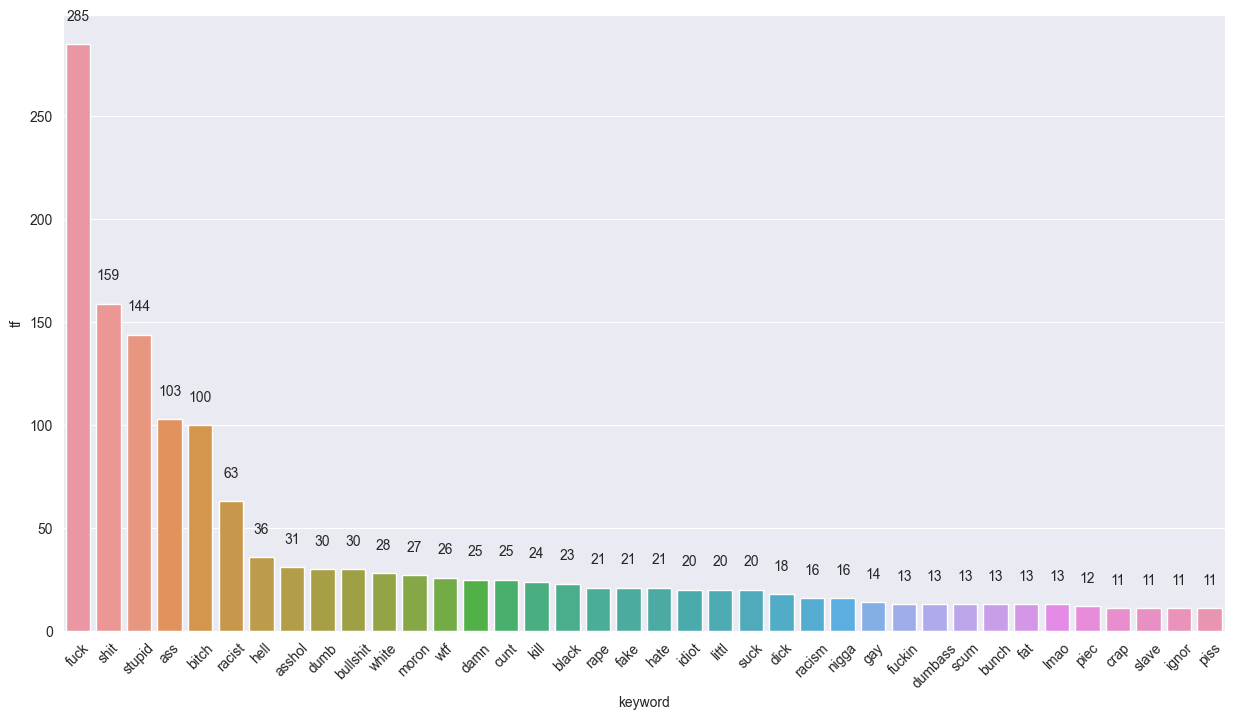

In [32]:
tf_kw_greater2 = tf_kw_greater2[tf_kw_greater2['tf']>10]
fig, ax = plt.subplots(figsize=(15, 8))
plt.xticks(rotation=45)
barchart = sns.barplot(x=tf_kw_greater2['keyword'], y=tf_kw_greater2['tf'], ax=ax)
barchart.bar_label(ax.containers[0], label_type='edge', padding=15)

In [ ]:
tf_kp_2 = pd.DataFrame([{'fuck that': 24, 'stupid crap': 23, 'stupid bitch': 21, 'stupid shit': 21, 'like shit': 17, 'is shit': 17, 'talking shit': 17, 'fucking funny': 15, 'fucking dumb': 15, 'fucking lame': 15, 'is stupid': 15, 'stupid people': 14, 'serious shit': 14, 'crazy ass': 14, 'Dumb ass': 14, 'fuck yourselves': 13, 'FUCK YOU': 13, 'fuck you': 13, 'Fake bullshit': 13, 'fuck them': 13, 'cheap ass': 13, 'dumb ass': 13, 'Shit on': 12, 'fucking losers': 12, 'white ass': 11, 'So stupid': 11, 'Fuck you': 11, 'a bitch': 11, 'looking ass': 11, 'fuck up': 11, 'dumb Bitch': 11, 'shit like': 10, 'truly stupid': 10, 'weak ass': 10, 'the fucking': 10, 'fucking hilarious': 10, 'stupid thing': 10, 'ass white bitch': 10, 'shit you': 10, 'dumbass bitch': 9, 'fake ass': 9, 'the fuck': 9, 'this stupid': 9, 'so stupid': 9, 'fucking idiot': 9, 'dumb bitch': 9, 'shit crazy': 9, 'pieces of shit': 8, 'like crap': 8, 'You stupid': 8, 'fucking fate': 8, 'Nasty bitch': 8, 'stupid OPINION': 8, 'smart ass': 8, 'looks stupid': 8, 'fucking hate': 8, 'yo fuck': 8, 'being stupid': 8, 'fucked up': 7, 'you worthless': 7, 'fuck her': 7, 'like a shit': 7, 'are so stupid': 7, 'stupid mistakes': 7, 'dumb bitch off': 7, 'Such a stupid': 7, 'Fake bitch': 7, 'smarter ass': 7, 'bunch of shit': 7, 'Fucking hilarious': 7, 'Cheap ass': 7, 'You fucking': 7, 'stupid being': 7, 'what the fuck': 6, 'bullshit like': 6, 'shut the fuck up': 6, 'you dumb': 6, 'Pieces of shit': 6, 'rude as fuck': 6, 'piece of shit': 6, 'white person': 6, 'worthless bullshit': 6, 'black people': 6, 'think fuck': 6, 'a piece of shit': 6, 'shit father': 6, 'fucking assholes': 6, 'what a stupid': 6, 'fucking unbearable': 6, 'well shit': 6, 'as shit': 6, 'fuck yourself': 6, 'fuck out': 6, 'Fake as fuck': 5, 'Shitty ass people': 5, 'white America': 5, 'beat the shit out': 5, 'What a dick': 5, 'are too stupid': 5, 'so stupid.': 5, 'has shit': 5, 'black guy': 5, 'bunch of assholes': 5, 'Go fuck yourself': 5, 'The fucking': 5, 'This shit': 5, 'this shit': 5, 'actually stupid': 5, 'fuck off': 5, 'like damn': 5, 'god damn': 4, 'are Racist': 4, 'her ass': 4, 'fuck the shit out of': 4, 'fake as shit': 4, 'express racist things': 4, 'racist thing': 4, 'what a stupid name': 4, 'how the fuck': 4, 'What a moron': 4, 'damn this': 4, 'dumb as shit': 4, 'false propaganda': 4, 'go fuck themselves': 4, 'shit religion': 4, 'fuckin crazy': 4, 'bunch of fucking idiots': 4, 'like a fucking': 4, 'what a jerk': 4, 'biased shit': 4, 'fine ass': 4, 'full of shit': 4, 'fucking ridiculous': 4, 'be racist': 4, 'his bullshit': 4, 'fucking triggered': 4, 'funny crap': 4, 'black kids': 3, 'suck it up': 3, 'The hell with': 3, 'are basically stupid': 3, 'pack of assholes': 3, 'look ass': 3, 'complete bullshit': 3, 'throwing crap': 3, 'feel dumb as fuck': 3, 'fucked themselves': 3, 'Gay guy': 3, 'What the hell': 3, 'cheap bastards': 3, 'What a dummy': 3, 'to be racist': 3, 'Damn those': 3, 'White people': 3, 'black boy': 3, 'fuckin gets raped': 3, 'fuck you soon': 3, 'shit is fake': 3, 'fake outrage': 3, 'racist as fuck': 3, 'fucks children': 3, 'damn show': 3, 'beat the fuck out': 3, 'be damn': 3, 'stupid act': 3, 'stupid crime': 3, 'what the shit': 3, 'white people': 3, 'black man': 3, 'actually fucking': 3, 'kissing ass': 3, 'clown ass': 3, 'piece of trash': 3, 'you crazy': 3, 'you fools': 3, 'white guy': 2, 'race baiting': 2, 'slave owning ancestors': 2, 'white supremacist': 2, 'white supremacists': 2, 'laughed my nasty ass off': 2, 'a dirty whore': 2, 'your ass': 2, 'is a idiot': 2, 'Well fuck Religion': 2, 'You kick ass': 2, 'o shit': 2, 'some shit like that': 2, 'white slave owners': 2, 'that fucker': 2, 'disrespectful peoples': 2, 'literally retarded': 2, 'Laughing my ass OFF': 2, 'fucking hypocritical putz': 2, 'Fake news': 2, 'biased as fuck.': 2, 'so fucking stupid.': 2, 'this is stupid': 2, 'so annoying': 2, 'disrespectful cunt': 2, 'the big mouthed bitch': 2, 'fucking morons': 2, 'staged bullshit': 2, 'Fake News': 2, 'How dumb': 2, 'laughed my shit out': 2, 'you blacks': 2, 'fake news': 2, 'professional liars': 2, 'fuck these guys': 2, 'Fucking Hypocrite': 2, 'fucking moron': 2, 'black greasy ass': 2, 'being a bitch': 2, 'like garbage': 2, 'So fuckin what': 2, 'HYPOCRITICAL shit': 2, 'on this fuckin': 2, 'punch that bitch': 2, 'What the fuck': 2, 'cheap fucks': 2, 'disrespectful pig': 2, 'fucked over': 2, 'All fucking': 2, 'pretty dumb': 2, 'that bitch': 2, 'cheat the shit out': 2, 'spoiled bitch': 2, 'damn annoying': 2, 'little bitch': 2, 'Piece of shit': 2, 'Petty ass': 2, 'white supremacist crap': 2, 'slave owners': 2, 'where the hell': 2, 'Where the hell': 2, 'Holy fuck': 2, 'fuck her silly': 2, 'who the hell': 2, 'an idiot': 2, 'mentally unstable': 1, 'fuckin hoeeible': 1, 'shut up': 1, 'is biased': 1, 'That drunk': 1, 'drug dealers': 1, 'eat it up': 1, 'punks ass': 1, 'sounded stupid.': 1, 'is a rapist': 1, 'too stupid to': 1, 'racially profiled': 1, 'mentally disabled': 1, 'Beating some ass': 1, 'completely fuck': 1, ' up': 1, 'make this shit up': 1, 'having a power trip': 1, 'is moron': 1, 'Look ': 1, 'Your retarded': 1, 'gonna fuck with him': 1, 'white person.': 1, 'sensitive douche': 1, 'white pepole': 1, 'no black pepole': 1, 'fucks given': 1, 'on a power trip': 1, 'look like a bitch': 1, 'what a joke': 1, 'suck it up buttercup': 1, 'surprising mistakes': 1, 'Holy shit': 1, 'women whores': 1, 'some nasty': 1, 'a bastard': 1, 'throw his black ass out': 1, 'so damn rude': 1, 'shit clothes on': 1, 'little cunt': 1, 'life sucks for you': 1, 'Stop your bullshit': 1, 'holy shit': 1, 'spread your bullshit': 1, 'hot as fuck': 1, 'shits like this': 1, 'hoe fuck anyone': 1, 'Weak ass jokes': 1, 'busting your ass': 1, 'lying rapist': 1, 'Shows how stupid': 1, 'so drunk': 1, 'hate both fucking': 1, 'is gay': 1, 'is fucked': 1, 'a liar': 1, 'Chronic liars': 1, 'your life sucks': 1, 'bunch of butt': 1, 'Shut the hell up': 1, 'fat cunt': 1, 'wow fuck that': 1, 'is that fucking': 1, 'a bitch for': 1, 'racially profiling': 1, 'shit up his ass': 1, 'race baiting show': 1, 'being nasty': 1, 'utter moron': 1, 'stupid as hell': 1, 'for shit like that': 1, 'this is biased': 1, 'Bunch of fuckin': 1, 'Look ass up': 1, 'white nationalist': 1, 'a fucking asshole': 1, 'fuckin pussy': 1, 'fucked up thing': 1, 'a fucked up world': 1, 'good shit': 1, 'to shut up': 1, 'Are they retarded': 1, 'beat that ass': 1, 'Id fuck that': 1, 'being assholes': 1, 'raping the shit out': 1, 'fat fuck': 1, 'weird ass face': 1, 'old ass': 1, 'big gay': 1, 'to shut the hell up': 1, 'Stay the fuck away': 1, 'douche bags': 1, 'ass filled': 1, 'bunch of cheap ass': 1, 'fat ass': 1, 'nasty bitch': 1, 'suck it': 1, 'FAKE NEWS': 1, 'race baiter': 1, 'is Trash': 1, 'make shit up on the spot': 1, 'drug addict': 1, 'worthless animal': 1, 'filled with shit': 1, 'fucked off': 1, 'Bunch of trash': 1, 'awful people': 1}
])

In [33]:
tf_kp_3 = pd.DataFrame([{'black people': 2907, 'white person': 2667, 'fuck you': 2123, 'fucked up': 2056, 'what the fuck': 1989, 'white America': 1889, 'shut the fuck up': 1867, 'fake news': 1865, 'piece of shit': 1836, 'stupid bitch': 1806, 'beat the shit out': 1748, 'will kill you': 1663, 'rape victims': 1469, 'a bastard': 1451, 'pieces of shit': 1323, 'complete bullshit': 1317, 'Holy shit': 1239, 'What a dick': 1182, 'dumb ass': 1143, 'knee jerk': 1105, 'black kids': 1104, 'Spoiled twat': 1103, 'old fart': 1103, 'stupid people': 1100, "you're stupid": 1099, 'mentally unstable': 1098, 'fuckin hoeeible': 1097, 'shut up': 1096, 'Fuk You': 1095, 'god damn': 1094, 'is biased': 1093, 'Hard slut': 1092, 'That drunk': 1091, 'Fake as fuck': 1090, 'stupid crap': 1089, 'white guy': 1088, 'make room on mt': 1087, 'like crap': 1086, 'Choke on it': 1085, 'shit like': 1084, 'race baiting': 1083, 'drug dealers': 1082, 'go finish the 5th grade': 1081, 'slave owning ancestors': 1080, 'you worthless': 1077, 'eat it up': 1076, 'are Racist': 1075, 'the thing about the blacksssss': 1074, 'crack out face': 1073, 'You spineless pussies': 1072, 'fuck yourselves': 1071, 'FUCK YOU': 1070, 'white supremacist': 1069, 'People of color': 1068, 'white supremacists': 1067, 'being a bitch': 1067, 'punks ass': 1066, 'Maybe someone will shoot her': 1065, 'You stupid': 1064, 'bullshit like': 1063, 'fuck her': 1062, 'like a shit': 1060, 'like shit': 1059, 'gay Catholic': 1058, 'makes as much sense as a black man': 1057, 'is a faggot': 1056, 'laughed my nasty ass off': 1055, 'a show run by jews': 1054, 'bad lip': 1053, 'sounded stupid.': 1052, 'is a rapist': 1051, 'white ass': 1051, 'mocking your': 1050, 'you dumb': 1049, 'do that the little girl': 1048, 'suck it up': 1047, 'Poor little thing': 1046, "Her hand was in the lions' mouth": 1045, 'kept aggravating': 1044, 'fucking fate': 1043, 'is shit': 1041, 'Pieces of shit': 1040, 'her ass': 1039, 'too stupid to': 1038, "wasn't intelligent": 1037, 'mother was a virgin': 1036, 'she was rooting around': 1035, 'a dirty whore': 1034, 'are pricks': 1033, 'like a dumb': 1032, 'goes tanning': 1031, 'out the door': 1030, 'your ass': 1029, 'racially profiled': 1028, 'need to kill themselves': 1027, 'Shitty ass people': 1026, 'rude as fuck': 1025, 'fuck the shit out of': 1024, 'acts and sounds like a five year old': 1023, 'mentally disabled': 1022, 'go back to the depths of hell': 1021, 'put one of those ball sex those in his mouth': 1020, 'take goats dicks': 1019, 'look as crazy': 1017, 'Beating some ass': 1016, 'this shit': 1016, 'still throw stones': 1015, 'they clowned': 1014, 'turned a lesbian': 1013, 'fake as shit': 1012, 'is a idiot': 1011, 'completely fuck': 1010, ' up': 1009, 'winging cunt': 1008, 'hookers chest': 1007, 'How fucking great': 1005, 'make this shit up': 1004, "I'm done!": 1003, 'One is a bottom feeding scum sucker and the other is a fish': 1002, 'looney ass': 1001, 'Fake bullshit': 1000, 'lying dems': 999, 'They are all worthless': 998, "The tape didn't seem to work": 997, 'a nightstick up side his head sure as hell would': 996, 'is the worse of the two evils': 995, 'What the fuck': 995, 'trashes them': 993, 'what the fuck are they doing': 992, 'Well fuck Religion': 991, 'The hell with': 990, 'fuck that': 989, 'WhT the hell': 988, 'express racist things': 986, 'having a power trip': 985, "can't handle a little sass he should be making sandwiches for the real men": 984, 'tor fuck off': 983, 'are basically stupid': 982, 'That was fucking lame': 981, 'is moron': 980, 'are so stupid': 979, 'Do you have the balls for': 978, 'Of course you dont haha': 977, 'the devil aint do shit': 976, 'marry animals in some states': 975, 'hell even inanimate objects': 974, 'shame on you': 973, 'ya bunch of retards.': 972, 'fucked over': 972, 'Look ': 971, 'who talking': 970, 'Your retarded': 968, 'intent to fuck': 967, 'gonna fuck with him': 966, 'havent watch enough': 965, 'late night golden channel ffs': 964, 'So stupid': 963, 'butt hurt': 963, 'racist thing': 962, 'fucking hoodie': 961, 'rather cry racism': 960, 'fix any of her problems': 959, 'Whoa the left really is full of unstable people': 958, 'nazi racist': 957, 'You kick ass': 956, 'stuck my foot up all their asses': 955, 'you can be a delivery driver': 954, 'What a dumb bimbo': 953, 'fake ass': 953, 'shit lol': 952, 'supporters gay': 951, 'Take care you business bitch': 950, 'Some people are too stupid.': 949, 'Raised by 666 people': 948, 'o shit': 947, 'worthless bullshit': 946, 'uppity bitch': 945, 'white person.': 944, 'Rot in prison': 943, 'here is your tip': 942, 'sensitive douche': 941, 'shit face idiot': 940, 'witch hunt on': 939, 'dumbass bitch': 938, 'his feces upon': 936, 'some shit like that': 935, 'Class act': 934, 'Nasty bitch': 933, 'being stupid': 933, 'his substance abuse': 932, 'being ancestor to some of the biggest slave traders': 931, 'so stupid': 931, 'fucking funny': 930, 'Omg you are crying': 929, 'Holy shit act like one': 928, "you're crying like a fucking bitch": 927, 'Cant take you seriously': 926, 'white pepole': 925, 'no black pepole': 924, 'bullied by my color': 923, 'they dont see me in the dark': 922, 'say that shit one more time': 920, 'hear a minority talk': 918, 'the Alt Wrong': 917, 'white slave owners': 916, 'supporters love smoking dick': 915, 'fucks given': 914, 'that fucker': 913, 'foul mouthed': 913, 'not speaking proper English': 912, 'a foreigner like him': 911, 'just mind their own damn business': 910, 'scumbag club': 909, 'fuck them': 908, 'disrespectful peoples': 907, 'serious shit': 906, 'just STAPLED fucking mouth': 905, "don't they know you never fuck with the people who handle your food": 904, 'token negro': 900, 'on a power trip': 899, 'look like a bitch': 898, 'pack of assholes': 897, 'Dumb ass': 897, 'suck whiny little babies': 896, 'what a joke': 895, 'stupid OPINION': 894, 'suck it up buttercup': 893, 'bring me my damn change': 892, 'look ass': 891, 'be a butthurt': 890, 'crazy ass': 889, 'racist apologist': 888, 'U mad cause': 887, 'dope ass pool': 886, 'arabian nigga': 885, 'to fool and to profit from': 884, 'literally retarded': 883, 'blacks in any store': 882, 'talking shit': 880, 'Certain colors are intimidating to humans': 879, 'patties butt': 876, 'stupid mistakes': 875, 'surprising mistakes': 874, 'give a shit.': 872, 'throwing crap': 871, 'cheap ass': 870, 'pink lipped': 867, 'gon fuck some shit up': 866, 'Laughing my ass OFF': 865, 'sounds dirty': 864, 'Spot the moron': 863, 'What a loser.': 862, 'ZIP IT': 861, 'spewing nonsense': 860, 'illuminati agenda': 859, 'feel dumb as fuck': 858, 'passive aggressive': 857, 'ass to see any sunlight': 856, "there's no hope for you": 855, "it's funny if you just used to cry": 854, 'fucked themselves': 853, 'Gay guy': 852, 'truly stupid': 851, 'the solution to their stupidity': 850, 'making up stories': 848, 'trying to make himself look smart': 847, 'fucking dumb': 846, 'Cry some more..': 845, 'grow the fuck up one day': 844, 'biggest douche bag': 843, 'Fuck you': 842, 'wanna kill somebody': 841, 'what a stupid name': 840, 'dumb bitch off': 839, 'how the fuck': 838, 'stupid shit': 837, 'Shit on': 836, 'What the hell': 835, 'needs to burn in hell.': 834, 'is a criminal': 833, 'weak ass': 832, 'What a fucking biased show': 831, 'are too stupid': 830, 'incapable to get state Ids': 829, 'an actor': 828, 'Meadows has killed irony for good': 826, 'fucking hypocritical putz': 825, 'at gagging that cunt to shut him up': 824, 'too intelligent to be religious': 823, 'faking so stupidly': 822, 'ist racists': 821, 'racism ahahah': 819, 'so stupid.': 818, 'about fell over': 816, 'cheap bastards': 815, 'shitty service': 814, 'a bitch': 813, 'Sorry no sorry': 812, 'old crocodile': 811, 'Too bad Permit': 810, 'wasted her own bodily fluids': 809, 'crying for nothing': 808, 'villain in': 807, 'first chick is ugly': 806, 'Fake news': 805, 'fucking lame': 804, 'Muhammad believed this myth': 803, 'incorporated it into the Quran': 802, 'What a moron': 801, 'damn this': 800, 'go viral today ighT': 799, 'Ha ha !! See': 798, 'more shame on': 797, 'Never liked bitches or judges anyways': 796, 'women whores': 795, 'some nasty': 794, 'slept with': 793, 'the fuck': 792, 'the ignorance': 791, "God we've had thousands of them": 790, 'the fucking': 789, 'guys could bust balls': 788, "crybully's got involved.": 787, 'biased as fuck.': 786, 'so fucking stupid.': 785, 'grey haired body': 783, 'with be all dust and bones soon': 782, 'fucking makes me rage': 781, 'a dummy who says things somebody else writes': 780, 'What a dummy': 779, "Don't apologize to him": 778, 'have a black friend': 777, 'white people say to make it ok': 776, 'to be racist': 775, 'stomping the crap out': 774, 'thieves do': 773, 'Shove your tears up your racist ass': 772, 'has shit': 771, 'think fuck': 770, 'this is stupid': 769, 'Damn those': 768, 'fucking sexy asf': 767, 'Sub human commie trash': 766, "don't belong any where except hell fire": 765, 'White people': 764, 'so annoying': 763, 'black boy': 762, 'disrespectful cunt': 761, 'crimes you can think of look just like you': 760, 'quit being a muslim': 759, 'Such a stupid': 758, 'Fake bitch': 757, 'fuckin gets raped': 756, 'throw his black ass out': 755, 'reprehensible behavior(s)': 754, 'fat cunt': 754, 'the big mouthed bitch': 753, 'fat booty tho': 752, 'smart ass': 751, 'just as big of a crime': 750, 'an ass tho': 749, 'gas chambers': 748, 'fucking morons': 747, 'punk bitch in her place': 746, 'who in the hell let this girl into the usa': 745, 'belongs back in her 3rd world': 744, 'a little beeyotch': 743, 'be stripped of his authority': 742, 'forced to go change tires': 741, 'go pick peaches for a living': 740, 'slap that fucking loud mouth': 739, 'peices of shit': 738, 'Yeah keep promoting': 737, 'one sided fucking sell out fuck nuts': 736, 'This meadow man': 735, 'so damn rude': 734, 'haha what a stupid': 733, 'fuck you soon': 732, 'revenge is coming': 731, 'looking ass': 730, 'Devil made me do this': 729, 'HAS to have my last name dude': 728, 'shit is fake': 727, 'React zombies': 726, 'staged bullshit': 725, 'black guy': 724, "I'm white": 723, 'shit clothes on': 722, 'bunch of assholes': 721, 'what horse shit': 720, 'looks fucking disgusting': 719, 'this stupid': 718, 'proof that Hell needs more firewood': 717, 'Power went right to her head': 716, "doesn't have a leg to stand on": 715, 'the crap outta her': 714, 'Fake News': 713, 'go home': 712, 'beat his slave': 711, 'Nobody give ': 710, 'a crap about your heart': 709, 'fix your actions': 708, 'sexual assault': 708, 'closed down': 707, 'holy shit': 707, 'Talking down to': 706, 'a piece of shit': 705, 'fucking losers': 704, 'How dumb': 703, 'dirty dick': 702, 'laughed my shit out': 701, 'fucking imaan': 700, 'fake outrage': 699, 'bloody scum': 698, 'went bust': 697, 'white people': 697, 'be smartass': 696, 'bane to the living': 695, 'want to kill': 694, 'out of your asses': 692, 'you blacks': 691, 'little cunt': 690, 'Poor victims': 689, 'life sucks for you': 688, 'dumb as shit': 687, 'acting like a fucking child': 686, 'Stop your bullshit': 685, 'false propaganda': 684, 'professional liars': 682, 'Meaning go fuck': 681, 'brought this prejudgement on themselves': 680, 'for fucks sake': 678, 'Looks ugly as car accident': 677, 'fuck these guys': 676, 'skin colour': 675, 'brown skinned': 674, 'stare down my arse': 673, 'Go fuck yourself': 672, 'but damned': 670, 'even more boring in live action': 669, 'Dumb slag': 668, 'Fucking Hypocrite': 666, "can't find his Viagra": 665, 'what would my dick do': 664, 'Wake up bro': 663, 'fucking hilarious': 662, 'spread your bullshit': 661, 'you are a liar': 660, 'hot as fuck': 659, 'waited fut dude': 658, 'fucking moron': 657, 'shits like this': 656, 'smarter ass': 655, 'full of shit': 655, 'fuck up': 654, 'lap the fake shit up': 653, 'sucking cock': 652, 'find another hobby': 651, 'too stupid to understand the truth': 650, 'get raped': 649, 'too harsh': 648, 'mocking his accent': 647, 'looks stupid': 646, 'Chaps twats': 645, 'Nah this nigga': 644, 'hoe fuck anyone': 643, 'free my nigga': 642, 'Meadows is busted': 641, 'life aint a fucking sitcom': 639, 'ist rigged': 638, 'no intelligence of any note': 637, 'gets orgasm over': 636, 'crying and in pain': 635, 'sick monster.': 634, 'fiction false': 633, 'worship penis': 632, 'inserted into vagina': 631, 'deport people who are that stupid': 629, 'black greasy ass': 628, 'go fuck themselves': 627, "frickin' stupid jerk": 626, 'Weak ass jokes': 625, 'shit religion': 624, 'kicked that girl in her chest': 622, 'hate black': 621, 'hate my gums cause they black': 620, 'hate Whoopy Goldberg lips': 619, 'back of Forest Whitaker neck': 618, 'Black ass Wesley Snipes': 617, 'how the hell did she make it outta childhood': 616, 'fucking hate': 615, "cheep fucker's": 614, 'racist cunt': 613, 'busting your ass': 612, 'ignorance knows no boundaries': 611, 'yo fuck': 610, 'little bitch': 610, 'hes a racist': 609, 'lying rapist': 608, 'Shows how stupid': 607, 'a known womanizer': 606, 'shit father': 605, 'like garbage': 604, 'fuckin crazy': 602, 'so drunk': 601, "can't even get his words out": 600, 'bunch of shit': 599, 'is for pussies': 598, 'racist as fuck': 597, 'stay at home': 596, 'slut gold digger': 595, 'unscientific Koran': 594, 'needs a fucking early retirement': 593, 'bunch of fucking idiots': 592, 'hate both fucking': 591, 'is gay': 590, 'name is': 588, ' ugly': 587, 'fucks children': 586, 'stupid thing': 584, 'for jackass': 583, 'these communist': 582, 'damn show': 581, 'is fucked': 580, 'a liar': 579, 'Chronic liars': 578, 'criminal scum': 577, 'selling contaminated filth': 576, 'The fucking': 575, 'your life sucks': 574, 'This shit': 573, 'fucked royally': 572, 'fat fuck': 572, 'stab it with their Steel and knives': 571, 'kill the Beast': 570, 'bunch of butt': 569, 'beat the fuck out': 568, 'So fuckin what': 567, 'HYPOCRITICAL shit': 566, 'on this fuckin': 565, 'is talking cock': 564, 'ass white bitch': 563, 'you exposed us': 561, 'are extremist': 560, 'lookin cunt': 559, 'Shut the hell up': 558, 'fucking assholes': 557, 'Little millennial assholes': 556, 'made a very stupid': 555, 'sue their ass': 553, 'Those greasy': 553, 'ass bums': 552, 'punch that bitch': 551, 'in her ugly face': 550, 'like a fucking': 548, 'die in hell': 546, 'need a very big dick.': 545, 'will be in the least place': 544, 'self righteous arse': 543, 'cheap fucks': 543, 'grumpy fat jerk.': 542, 'these cunts': 541, 'probably touches kids': 540, 'What a bunch of': 538, 'what a jerk': 536, 'wow fuck that': 535, 'blacks live with a slave mentality': 534, 'that expose some of your viewers': 533, 'Just kill her': 532, 'be damn': 531, 'fooled me': 530, 'is that fucking': 529, 'is stupid': 528, 'Name and shame them cunts': 527, 'liberal bitch': 526, 'a bitch for': 525, 'racially profiling': 524, 'stereotypical opinions': 523, 'sign of racism.': 522, 'disrespectful pig': 521, 'must get fired': 520, 'Shame on u fuckers': 519, 'every damn time': 518, 'a dumbass saying dumb shit.': 517, 'on his ass': 516, 'funny as hell': 514, 'pisses me off': 512, 'Fucking hilarious': 511, 'the fucking media.': 509, 'over reaction': 508, 'dumb Bitch': 507, 'have shit for brains': 506, 'try opening up a lemonade stand': 505, "this isn't the Congo jungle we have laws and Order": 504, 'illegal shitstain': 503, "looting it's resources": 502, 'Where the fuck have YOU been': 500, 'a sex book': 499, 'shit up his ass': 498, 'third world shit hole do you live in': 497, 'keep racism alive': 496, 'keep making stupid shit': 495, 'such stupid points and no evidence': 494, 'This is bull shit': 493, 'a thug chances': 492, 'foot in your ass': 492, 'race baiting show': 491, 'RELIGIOUS PROHIBITIONS BE DAMNED': 490, 'fuck my P.O.': 489, 'mind your own business': 488, 'a big ass': 487, 'what a stupid': 486, 'so full of shit': 485, 'poop on': 484, 'being nasty': 483, 'like vagina': 482, 'Crooked politrix': 481, 'fucking unbearable': 480, 'stupid act': 479, 'Poor guy': 478, 'not able to have an erection': 477, 'abuse little girls': 476, 'sinker gesture': 474, 'All fucking': 473, "don't know a fucking thang": 472, 'what a douche bag': 471, 'stupid crime': 470, 'utter moron': 469, 'moral vacuums': 468, 'Silly media': 467, 'pretty dumb': 466, 'stupid as hell': 465, 'that bitch': 464, 'gettin her add BEAT': 463, 'biased shit': 461, 'rag on': 460, 'well shit': 459, 'big gay': 459, 'bigoted militant': 457, 'a bunch of unreasonable': 456, 'little druggie': 454, 'got served right': 453, 'fucking idiot': 452, 'fine ass': 451, 'foot in her ass': 449, 'lowest form of sleaze': 448, 'Cheap ass': 447, 'foot up her ass out': 443, 'this shit is so funny': 442, 'You fucking': 441, 'fucking ridiculous': 440, 'put my dick in': 439, 'what the shit': 438, 'for shit like that': 437, 'white actor': 435, 'going way too far': 434, 'racial profiling': 433, 'Worst fucking show': 432, 'stop going to the church and mosques': 430, 'all twats': 429, 'this is biased': 428, 'hoes in music': 427, 'Bunch of fuckin': 426, 'low life criminals': 425, 'go to hell': 425, 'cheat the shit out': 424, 'get socked up in the face': 422, 'Look ass up': 421, 'child abuser': 419, 'white nationalist': 418, "devil's of all kind make up": 417, 'not ashamed': 416, 'grab her by the pussy': 415, "would've flipped him off": 414, 'genetically inferior': 413, 'Your priorities are fucked': 412, 'a fucking asshole': 411, 'fuckin pussy': 410, 'Fuck Meadows': 409, 'bomb ass': 407, 'black man': 406, 'look like criminals': 405, 'fucked up thing': 404, 'a fucked up world': 403, 'worship a penis and a pussy': 402, 'dude looks shady': 401, 'as shit': 400, 'good shit': 399, 'who gives a fuck': 398, 'to shut up': 397, 'violence towards': 396, 'cocaine snorting': 395, "numb lip's": 394, 'This Abdoolism': 393, 'disgusting in every way': 392, 'pathetic cult': 391, "don't have brain": 390, 'funniest shit in the world': 389, 'this shit was funny': 388, 'Islam is a joke': 387, 'Muslims are so silly': 386, 'start drinking piss': 385, 'Muslims are stupid': 384, 'only useful to piss on': 383, 'wankers woman is a delight': 382, 'What a hair cut': 381, 'fatty who wanted him fired': 380, 'rich as fuck now': 379, 'the same shit': 378, 'be racist': 377, 'lying corrupt cunt': 376, 'got her ass kicked': 375, 'put his foot in her arse': 374, 'always been this stupid?': 373, 'disgusting terrorist cunt': 372, 'pure evil': 371, 'evil energy': 370, 'temper tantrum': 369, 'nephews as pawns': 368, 'using a woman as a pawn': 367, 'his bullshit': 366, 'is hilarious': 365, 'this pissed': 364, 'suck one black guy': 363, 'extremist Muslim men and women': 362, 'kill out spoken women': 361, 'This world has no place for Islam': 360, 'instruments of power and terror': 359, 'turn your life into hell': 358, 'Are they retarded': 357, 'Ads holes.': 356, 'more shit worse than this going on': 355, 'keeping a little fucker locked up longer': 354, 'Meddling meadows': 353, 'fucking racist period': 352, 'insanity by itself': 351, 'crazy bullshit.': 350, 'beat that ass': 349, 'new bullshit': 348, 'white people are scary dog': 345, 'to slap you': 344, 'drunken dick': 343, 'an offer to kick my ass': 341, 'found your dead rotting bodies': 340, 'Id fuck that': 339, 'dumb bitch': 338, 'fuck yourself': 337, 'being assholes': 336, 'mad as hell': 336, 'keep lieing': 335, 'keep drilling this garbage': 334, 'so indescribably upset': 333, 'actually fucking': 332, 'raping the shit out': 331, 'product of feminsism': 330, 'melinnial douchebag': 329, 'trophey bullshit': 328, 'Trash parents raising': 327, 'trash kids': 326, 'Kek biased': 325, 'huge fucking idiot': 324, 'shit crazy': 323, 'sensitive little bitches': 322, 'get their panties in a wad': 321, 'pettiest shit': 320, 'power crazed': 318, 'dummy picking': 317, 'many threats you get': 316, "hope you don't get no sleep": 315, 'fucking triggered': 314, 'stupid cunt': 313, 'To hell with black and brown people': 312, 'an ignorant narcissistic': 311, 'actually stupid': 310, 'Who the hell choreographs these': 309, ' dude': 308, 'Brainless fools': 307, 'worse then animals': 306, 'bloody morons': 305, 'stop biching in the comments': 304, 'go watch the sex tape': 303, 'be able to sleep at night with all your shame': 301, 'kissing ass': 300, 'beleive this shit still': 299, 'stupid being': 298, 'stinking sh*tful': 297, 'shit you': 296, 'Put the little bitch in the can': 295, 'lock her up': 294, 'darn racist': 293, 'Go to hell': 292, 'to kill off': 290, 'fuck off': 290, 'She is just bitch': 289, 'weird ass face': 288, 'fucking scum': 287, 'bitch gets aids': 286, 'hung over as hell': 285, 'fuck out twat': 284, 'her pimp will kill her': 283, 'bunch of dirty racist': 281, 'spoiled bitch': 280, 'attitude dumbasses': 278, 'old ass': 277, 'bias fuck': 276, 'fuck u guys': 275, 'damn annoying': 274, 'Piece of shit': 272, 'should be publicly executed': 271, 'dirty and unclean hands': 270, 'suck it': 270, 'blonde anchor woman': 269, 'your head clearly belongs': 268, 'low class scum': 264, 'bogus religion': 263, 'should be killed': 262, 'gone downhill': 261, 'clown ass': 260, 'ur dumb ass': 258, 'WHITE greedy people': 257, 'long ass ugly': 256, 'poorly imitated': 253, 'funny crap': 252, 'created from dirt and incest.': 251, 'hilarious skit': 250, 'grab men by the gonads': 248, 'BET YOUR FAT ASS': 247, 'GO BACK TO FUCKU UNIVERSITY AND GET A CLUE': 246, 'Quite exact parody': 245, 'hammer their sqauare pegs into the round hole': 244, 'take that school kid outside': 243, "hang a dirty lickin' on him": 242, 'to shut the hell up': 241, 'lie everything': 240, 'mass murder': 239, 'Ignorant loser': 238, 'Petty ass': 237, 'Learn some respect': 235, 'Stay the fuck away': 234, 'bullying her as': 233, 'smartass bag': 232, 'ass backwards': 231, 'douche bags': 230, 'bully him': 229, 'snotty little bitch': 228, 'to punch her in the mouth': 225, 'white supremacist crap': 224, 'Drop kick this bitch': 223, 'ass filled': 222, 'bunch of cheap ass': 220, 'wild man': 219, 'my ass off': 218, 'hell out of': 216, 'so hilarious': 214, 'fuck out': 213, 'go cry to mommy': 212, 'a criminal': 211, 'officially full of shit': 210, 'bunch of dickheads': 208, 'little shits themselves': 207, 'slave owners': 206, 'raped the female': 205, 'old racists': 203, 'Anti free speech': 202, 'big joke': 201, 'fat fucking': 200, 'fat ass': 199, 'fat asses': 198, 'let the media control you': 197, 'shag your mum': 196, 'out of touch': 195, 'power hungry POS': 194, 'plain stupid': 193, 'you pooped': 192, 'prank my ass': 191, 'not being white': 190, 'where the hell': 189, 'Where the hell': 188, 'may vomit': 187, 'Holy fuck': 186, 'Who cares': 185, 'to grope women': 184, 'a pot calling the kettle black': 183, 'nasty bitch': 182, 'fat guy': 181, 'yelling died': 180, 'to crawl back into the swamp': 179, 'shove a stick up that girls ass': 178, 'so ugly and annoying': 176, 'on crack': 175, 'looks like a deprived Ethiopian': 174, 'fuck her silly': 173, 'EVERY1 SHUT UP': 172, 'sounds like abuse of power': 171, 'keep living in the past': 170, 'who cares': 169, 'a shrill woman': 168, 'human scum.': 167, 'piece of trash': 166, 'a tosser': 165, 'needs to get cancer and die': 164, 'hell do a better job': 163, 'a bum': 162, 'to steal': 161, 'gonna die in hell': 160, 'Is she high on': 159, 'FAKE NEWS': 158, 'to kill black': 156, 'race baiter': 155, 'racist ideologies': 154, 'suck a dick': 152, 'a stupid level': 151, 'duck face': 150, 'who the hell': 149, 'white privilege': 148, 'bunch of cheap': 146, 'disrespectful asses': 145, 'an idiot': 144, 'son of a bitch': 143, 'greedy bitches': 141, 'Animals CANNOT consent': 140, 'great Looter': 139, 'slave trader': 138, 'Dog piss upon him': 137, 'ugly monster': 136, 'deserves EVERYTHING bad': 135, 'run out from a mosque and destroy': 133, 'hairy chest': 132, 'is Trash': 131, 'like damn': 129, 'mass murdering': 128, 'delt in slavery': 127, 'sex slavery': 126, 'sex slaves': 125, 'Real devine': 124, 'want him fired': 122, 'Want him fired': 121, 'go back to elementary school': 120, 'lick peoples ass': 119, 'be pissed': 118, 'be totally insane': 117, 'unworthy of respect': 116, 'back woods folk': 115, 'sex vacations': 114, 'a fucking joke': 113, 'make shit up on the spot': 112, 'you crazy': 111, 'you fools': 110, 'you mugs': 109, 'shitting out': 107, 'that race': 106, 'to piss': 105, 'racist parents': 104, 'old DEMONIC': 103, 'KILL HIM': 102, "his mother's arse hole": 101, 'son of bitch': 101, 'his daughters hole': 100, 'somewhat stupid': 99, 'gutless people': 98, 'most obnoxious': 97, 'drug addict': 96, 'sex whore': 95, 'talentless cast': 94, 'greedy little PIG': 90, 'Kangaroo courts': 89, 'executing citizens': 88, 'creepy fans': 86, 'got their ass fired': 85, 'goes down faster': 84, 'doxing these people': 83, 'weak shit': 82, 'a jerk': 81, 'treated people': 80, 'be treated as property': 79, 'moral to rape': 78, 'to beat': 77, 'white racist': 76, 'spam emojis': 74, 'typical of haughty': 73, 'malicious behavior': 72, 'ore rasist': 71, 'worthless animal': 70, 'sick of racism': 69, 'bad ass': 67, 'highlight of the fly': 66, 'lines of bullshit': 65, 'filled with shit': 64, 'Let the cunt rot': 63, 'What a Bitch': 61, 'go pussy': 60, 'make me sick': 59, 'nasty fuck': 58, 'is a dick': 56, 'beaten into a coma': 55, 'mental issues': 54, 'you suck': 53, 'sex offender': 52, 'whiny petty bitch ass': 51, 'Slap her': 50, 'Fire him': 49, 'fake ass stunt': 48, 'take sucks': 47, "isn't worth the paper it's written on": 46, 'pile of old dog': 45, 'get pissed off': 44, 'fucked off': 43, 'big ass nose': 41, 'fuck this fat': 40, 'pissed off': 38, 'watched too much porn': 36, 'defeated by hair spray': 35, 'to hell': 32, 'beat the shit': 31, 'put your foot up your ass': 30, 'Bunch of trash': 29, 'the misinformed': 27, 'keep kickin': 26, 'fucking attitude': 24, 'ditsy ass': 23, 'fuck you up': 22, 'a hell': 21, 'human Pig hybrid': 20, 'be a pig': 19, 'ridiculously biased': 17, 'peed my trousers': 16, 'eat shit': 15, 'awful people': 13, 'little slut': 12, 'go back to church school': 10, 'thug gangster': 8, 'suvking ass': 7, 'dick sucker': 5, 'biased bullshit': 3, 'White people suck': 2, 'be a dick': 1}])


In [ ]:
tf_kp_greater2= pd.DataFrame(list(tf_kp_3.items()), columns=['keyphrase', 'tf'])

ld = []
itr =0
for itr in range(len(tf_kp_greater2['tf'])):
    if tf_kp_greater2['keyphrase'][itr].lower() not in ld:
        ld.append(tf_kp_greater2['keyphrase'][itr].lower())
        tf_kp_greater2['tf'][itr] = int(tf_kp_greater2['tf'][itr].to_string().split('    ')[1])
    else:
        tf_kp_greater2['tf'][itr] = 0
        print('else')
    
    print(tf_kp_greater2['tf'][itr])
    itr+=1

In [44]:
keyp_tf = tf_kp_greater2[tf_kp_greater2['tf']>1000]
keyp_tf = keyp_tf.head(25)
keyp_tf

,keyphrase,tf
0,black people,2907
1,white person,2667
2,fuck you,2123
3,fucked up,2056
4,what the fuck,1989
5,white America,1889
6,shut the fuck up,1867
7,fake news,1865
8,piece of shit,1836
9,stupid bitch,1806


[Text(0, 15, '2907'),
 Text(0, 15, '2667'),
 Text(0, 15, '2123'),
 Text(0, 15, '2056'),
 Text(0, 15, '1989'),
 Text(0, 15, '1889'),
 Text(0, 15, '1867'),
 Text(0, 15, '1865'),
 Text(0, 15, '1836'),
 Text(0, 15, '1806'),
 Text(0, 15, '1748'),
 Text(0, 15, '1663'),
 Text(0, 15, '1469'),
 Text(0, 15, '1451'),
 Text(0, 15, '1323'),
 Text(0, 15, '1317'),
 Text(0, 15, '1239'),
 Text(0, 15, '1182'),
 Text(0, 15, '1143'),
 Text(0, 15, '1105'),
 Text(0, 15, '1104'),
 Text(0, 15, '1103'),
 Text(0, 15, '1103'),
 Text(0, 15, '1100'),
 Text(0, 15, '1099')]

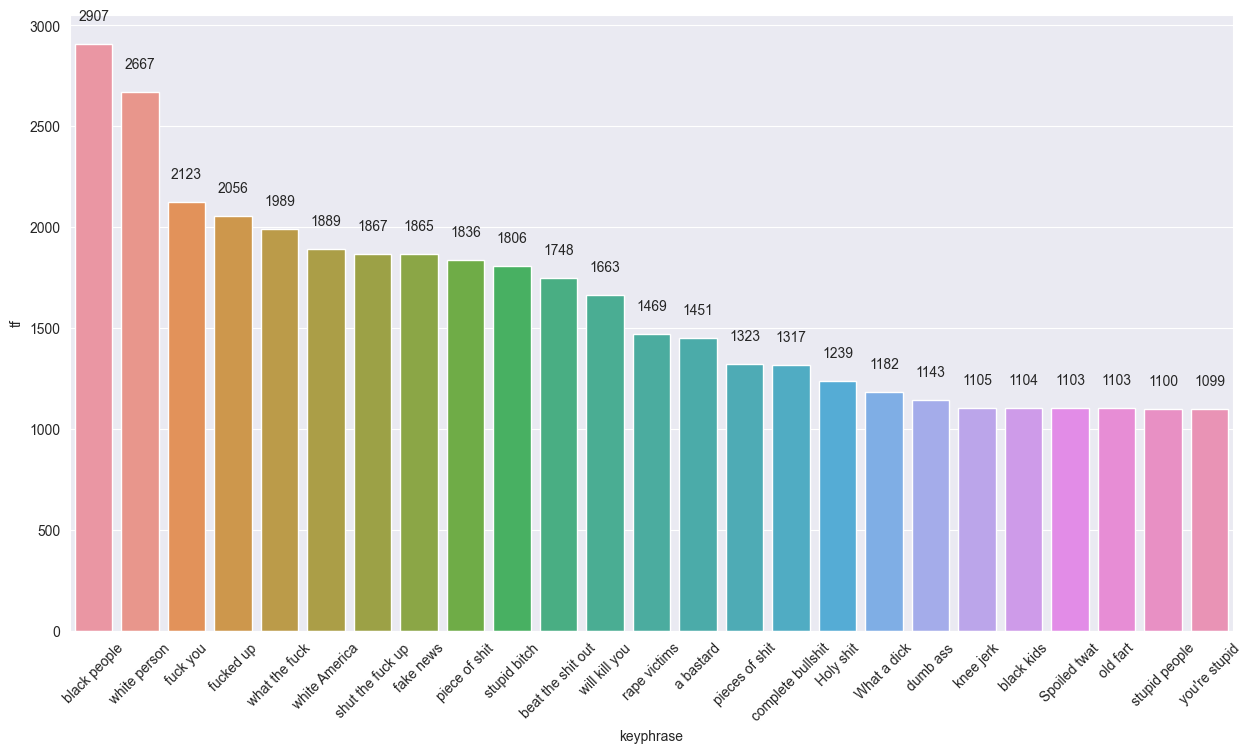

In [45]:
figp, axp = plt.subplots(figsize=(15, 8))
plt.xticks(rotation=45)
barchartp = sns.barplot(x=keyp_tf['keyphrase'], y=keyp_tf['tf'], ax=axp)
barchartp.bar_label(axp.containers[0], label_type='edge', padding=15)